Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Unzipping the uploaded training and test data

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("drive/MyDrive/T2_organized.zip")
zip_ref.extractall()
zip_ref.close()

(630,)
Replicated
14
[ 0  3 10  4  7 10  9  6  1 11  0  7 12  1  2 12  6  4  9 10  4 11  6  6
  0  5  1  7  3  0  9 11 12 11 11 10 12  8  7  9 13 13 13  9  0  3 12  8
  2  4  8  7  6 11  4  7  1 13  9 13 10  2  9 13  8  8  1  8 10  5 13  3
  7  8  9  9  5 12 10  1 13 13  8 12  3  2  1  3  6  4 10  7 11  2  3  6
 10  8  8  4  2  4 10  4  4 12  9  7  4  7  7  2  6  8  2  9  2  4  1  6
  2  4 13  9  5  3 10  3  1  5 11 12  3  8  9  6 12 11 11  6  5  1 11  2
 12  5  8 13  8 12 13  2  2  4  6  5  8  6  2  8  4  1  5  4  2  8  9 10
  6  3 13  7  9  3  5  1  1  1 13  9  2  2 13 11  9  3  1  0  3  9  5  7
  3  0 11  4 10  0 12  2  5 13  0 13  2  0 13 10 12 13  2  8  8  8  1  9
 12  4  6  7 12 10  4 13  4 13 13  3  4  3  2 10  0  6  8  2  5 11  5  7
  4  2  4  6  2  1  2 10  7  0  4 13  3 12  1  4  0  3  8  1  9 13  8  6
  7 11 13 12  2  1  4  0  8  7 11 10  0  0  7  5  2  7  5  1  9  3  0  5
  4 11 12  5  4  0  6  9  5  6  0  9  1  3  2  7  5  9  9  7  1  0 13  5
  9 13  3 12  0  9  8  1 13  0

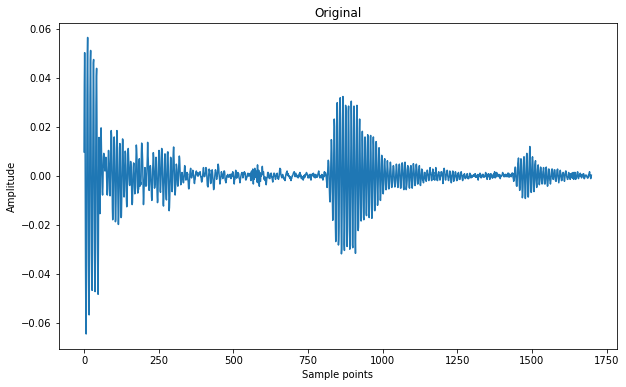

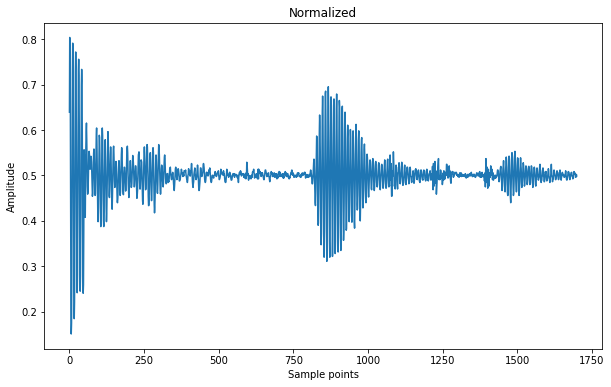

In [ ]:
# Import the required libraries
import pathlib
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
import matplotlib.pyplot as plt
from google.colab import files

# Path to the T2_organized folder is saved in data_dir 
data_dir = pathlib.Path("T2_organized/Train")
# Labels are programmatically acquired with the following code
class_names_labels = np.array(sorted([item.name for item in data_dir.glob("*")]))

data_dir_str = "T2_organized/Train"
data_dir = pathlib.Path(data_dir_str)
# Path to the location/ label folders
class_names = np.array(sorted([item for item in data_dir.glob("*")]))
# Getting the path to one of the labels
internal_dir_str = (data_dir_str+"/"+class_names[1].name)
# Converting the path string to a path object
internal_dir = pathlib.Path(internal_dir_str)
# Getting all the iteration file names inside one of the labels
iteration_names = np.array(([item for item in internal_dir.glob("*")]))
# Path to the training folder as a string
train_dir="T2_organized/Train/"
#  Converting the path string to a path object
train_dir_os = os.fsencode(train_dir)
# Initializing a zero array where the data from the files can be read
# The shape of the array is (number of locations in the container, number of iterations, 
# the number of sampled points in each iteration/ file)
training_data_array = np.zeros((len(class_names),len(iteration_names),10000))
# Creating an empty list in which the sampled values read from each file will be saved temporarily
numbers = []
# Creating a list where the labels/ locations for each iteration will be saved
training_labels = []

# The outer for loop controls the iteration of label/ location folders
for idx,(root, dirs, files) in enumerate(os.walk("T2_organized/Train/")):
    dirs.sort()
    # The inner for loop controls the iteration of files within those folders
    for file_idx, file in enumerate((sorted(files))):  
      if file.endswith(".txt"):
         with open((os.path.join(root, file))) as fp:
         #Iterate through each line
          for line in fp:
             numbers.extend( #Append the list of numbers to the result array
              [float(item) #Convert each number to a float
               for item in line.split() #Split each line of whitespace
             ])
          # Append the training labels to the list for each file read
          training_labels.append((root.split(os.path.sep)[-1]))
      # Each line read is saved into the predefined array.
      # Idx is -1 because idx starts at 1 instead of 0
      training_data_array[idx-1,file_idx,:] = numbers.copy()
      # The temporary buffer is emptied.
      numbers =[]
#  Array is reshaped from 3D to 2D. 14 classes x 45 iteration/ files = 630.
training_data_array_1 = training_data_array.copy().reshape(630,10000)

# Array is reshaped again, one column is added to facillitate the implementation of the algorithm
training_data_array_1 = training_data_array_1.reshape((training_data_array_1.shape[0], training_data_array_1.shape[1], 1))

# Only the first 1700 sampled points from the 10000 are selected/ sliced.  
training_data_array_1 = training_data_array_1.copy()[:,:1700,:]

# List of labels is converted into a numpy array
training_labels = np.array(training_labels)
# training_labels = np.tile(training_labels.copy(), (10))
print(training_labels.shape)

# Max and Min values contained in the files are acquired
max_value = np.amax(training_data_array)
min_value = np.amin(training_data_array)

# A copy of the array is made and two arrays for iteration are created.
training_data_array_normalized = training_data_array[:].copy()
first_iteration_array = range(0,len(class_names))
second_iteration_array = range(0,len(iteration_names))
# Min-max normazlization is performed
for idx_1 in first_iteration_array:
  for idx_2 in second_iteration_array:
    training_data_array_normalized[idx_1, idx_2,: ] = ((training_data_array[idx_1, idx_2,: ]-min_value)/(max_value-min_value))
# Copy of an array is made
training_data_normalized_reshaped = training_data_array_normalized.copy()
#  Array is reshaped from 3D to 2D. 14 classes x 45 iteration/ files = 630.
training_data_normalized_reshaped = training_data_normalized_reshaped.reshape(630,10000)
# Checking
# training_data_normalized_reshaped = np.tile(training_data_array_normalized.copy().reshape(630,10000), (10, 1))
print("Replicated")

# Array is reshaped again, one column is added to facillitate the implementation of the algorithm
training_data_normalized_reshaped = training_data_normalized_reshaped.reshape((training_data_normalized_reshaped.shape[0], training_data_normalized_reshaped.shape[1], 1))

training_data_normalized_transposed = training_data_normalized_reshaped.copy()
# Only the first 1700 sampled points from the 10000 are selected/ sliced.  
training_data_normalized_transposed = training_data_normalized_transposed[:,:1700,:]
# Sliced array is reshaped to (630,1700,1) for facillitating the implementation of the algorithm
training_data_normalized_transposed = training_data_normalized_transposed.reshape((training_data_normalized_transposed.shape[0], training_data_normalized_transposed.shape[1], 1))

num_classes = len(class_names_labels)
print(num_classes)

# Training labels are changed are assigned numbers from 0-13
le = preprocessing.LabelEncoder()
le.fit(class_names_labels)
le.classes_
training_labels = le.transform(training_labels)
training_labels_transposed = training_labels[:].copy()
training_labels_transposed = training_labels_transposed

# Data is saved into x_train
x_train = training_data_normalized_transposed
# Labels are saved into y_train
y_train = training_labels_transposed
# A random number to shuffle the data
idx = np.random.permutation(len(x_train))
# Data is shuffled
x_train = x_train.copy()[idx]
y_train = y_train.copy()[idx]


print(y_train)

original_sample = training_data_array_1[0,:,:]
normalized_sample = x_train[0,:,:]
print(y_train[44])


print("Orginal sample is: ")
print(original_sample)
print("Normalized sample is: ")
print(normalized_sample)
plt.figure(figsize=[10, 6])
plt.xlabel("Sample points")
plt.ylabel("Amplitude")
plt.plot(original_sample)
plt.title('Original')
plt.savefig("orginal.svg")
plt.figure(figsize=[10, 6])
plt.xlabel("Sample points")
plt.ylabel("Amplitude")
plt.plot(normalized_sample)
plt.title('Normalized')
plt.savefig("Normalized.svg")

['k15' 'k16' 'k17' 'k18' 'k19' 'k20' 'k21' 'k22' 'k23' 'k24' 'k25' 'k26'
 'k27' 'k28']
[PosixPath('T2_organized/Test/k16/16T2x47.txt')
 PosixPath('T2_organized/Test/k16/16T2x48.txt')
 PosixPath('T2_organized/Test/k16/16T2x54.txt')
 PosixPath('T2_organized/Test/k16/16T2x46.txt')
 PosixPath('T2_organized/Test/k16/16T2x59.txt')
 PosixPath('T2_organized/Test/k16/16T2x60.txt')
 PosixPath('T2_organized/Test/k16/16T2x58.txt')
 PosixPath('T2_organized/Test/k16/16T2x55.txt')
 PosixPath('T2_organized/Test/k16/16T2x53.txt')
 PosixPath('T2_organized/Test/k16/16T2x49.txt')
 PosixPath('T2_organized/Test/k16/16T2x50.txt')
 PosixPath('T2_organized/Test/k16/16T2x57.txt')
 PosixPath('T2_organized/Test/k16/16T2x51.txt')
 PosixPath('T2_organized/Test/k16/16T2x56.txt')
 PosixPath('T2_organized/Test/k16/16T2x52.txt')]
2
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  4  4  

Text(0.5, 1.0, 'Normalized')

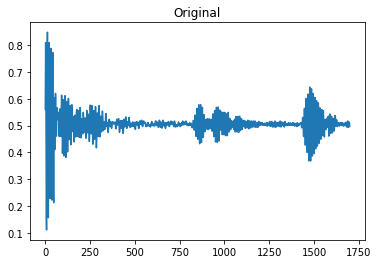

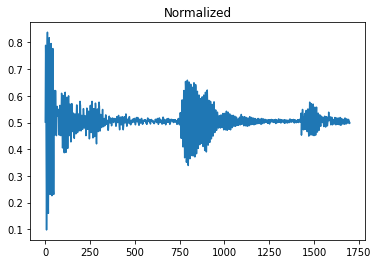

In [ ]:
data_dir_test = pathlib.Path("T2_organized/Test")
class_names_labels_test = np.array(sorted([item.name for item in data_dir_test.glob("*")]))
print(class_names_labels_test)

data_dir_str_test = "T2_organized/Test"
data_dir_test = pathlib.Path(data_dir_str_test)
class_names_test = np.array(sorted([item for item in data_dir_test.glob("*")]))
internal_dir_str_test = (data_dir_str_test+"/"+class_names_test[1].name)
internal_dir_test = pathlib.Path(internal_dir_str_test)
iteration_names_test = np.array(([item for item in internal_dir_test.glob("*")]))

test_dir="T2_organized/Test/"
test_dir_os = os.fsencode(test_dir)

test_data_array = np.zeros((len(class_names_test),len(iteration_names_test),10000))

print((iteration_names_test))

numbers_test = []
test_labels = []

for idx_test,(root, dirs, files) in enumerate(os.walk("T2_organized/Test/")):
    dirs.sort()
    for file_idx_test, file in enumerate((sorted(files))):  
      if file.endswith(".txt"):
         with open((os.path.join(root, file))) as fp:
         #Iterate through each line
          for line in fp:
             numbers_test.extend( #Append the list of numbers to the result array
              [float(item) #Convert each number to a float
               for item in line.split() #Split each line of whitespace
             ])
          test_labels.append((root.split(os.path.sep)[-1]))
          # print(len(numbers_test))
      # print(files)
      test_data_array[idx_test-1,file_idx_test,:] = numbers_test[:10000].copy()
      numbers_test = []

test_labels = np.array(test_labels)

max_value_test = np.amax(test_data_array)
min_value_test = np.amin(test_data_array)



test_data_array_normalized = test_data_array[:].copy()
first_iteration_array_test = range(0,len(class_names_test))
second_iteration_array_test = range(0,len(iteration_names_test))

for idx_1 in first_iteration_array_test:
  for idx_2 in second_iteration_array_test:
    test_data_array_normalized[idx_1, idx_2,: ] = ((test_data_array[idx_1, idx_2,: ]-min_value_test)/(max_value_test-min_value_test))

test_data_normalized_reshaped = test_data_array_normalized.copy()
test_data_normalized_reshaped = test_data_normalized_reshaped.reshape(210,10000)
test_data_normalized_reshaped = test_data_normalized_reshaped.reshape((test_data_normalized_reshaped.shape[0], test_data_normalized_reshaped.shape[1], 1))

test_data_normalized_transposed = test_data_normalized_reshaped.copy()
test_data_normalized_transposed = test_data_normalized_transposed[:,:1700,:]
test_data_normalized_transposed = test_data_normalized_transposed.reshape((test_data_normalized_transposed.shape[0], test_data_normalized_transposed.shape[1], 1))
x_test = test_data_normalized_transposed


# num_classes_test = len(class_names_labels_test)
num_classes_test = 2
print(num_classes_test)

le_test = preprocessing.LabelEncoder()
le_test.fit(class_names_labels_test)
le_test.classes_
test_labels = le_test.transform(test_labels)
test_labels_transposed = test_labels[:].copy()
test_labels_transposed = test_labels_transposed
y_test = test_labels_transposed
idx = np.random.permutation(len(x_test))

x_test = x_test.copy()
y_test = y_test.copy()


print(y_test)

original_sample_test = x_test[14,:,:]
normalized_sample_test = x_test[16,:,:]


print("Orginal sample is: ")
print(original_sample_test)
print("Normalized sample is: ")
print(normalized_sample_test)

plt.plot(original_sample_test)
plt.title('Original')

plt.figure()
plt.plot(normalized_sample_test)
plt.title('Normalized')

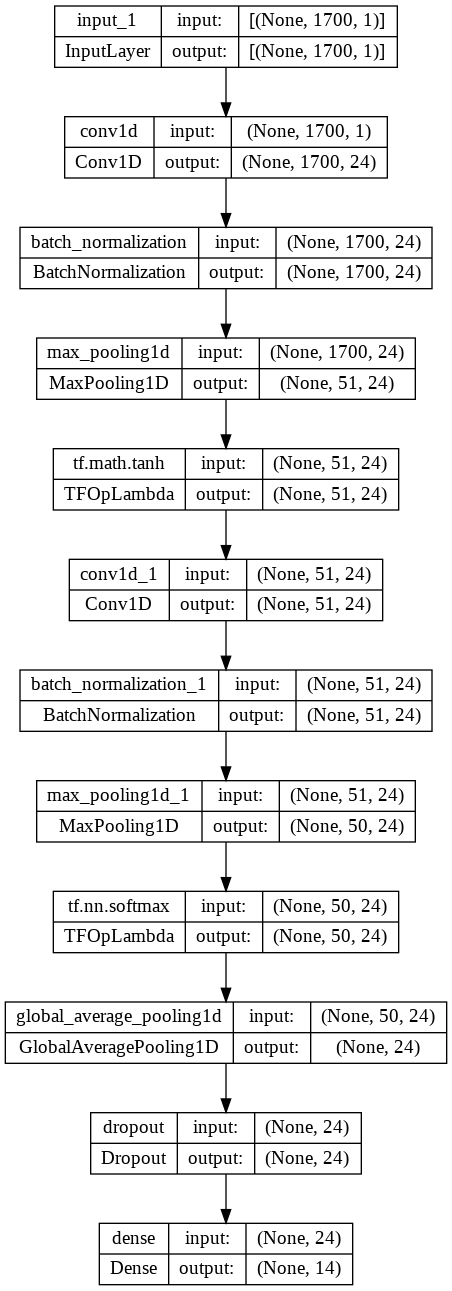

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=24, kernel_size=600, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    max_pool = tf.keras.layers.MaxPooling1D(pool_size=200, strides=30)(conv1)
    conv1 = tf.keras.activations.tanh(max_pool)

    conv2 = keras.layers.Conv1D(filters=24, kernel_size=600, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    max_pool_2 = tf.keras.layers.MaxPooling1D(pool_size=2, strides=1)(conv2)
    conv2 = tf.keras.activations.softmax(max_pool_2)
    gap = keras.layers.GlobalAveragePooling1D()(conv2)
    drop2 = keras.layers.Dropout(0.5)(gap)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(drop2)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 200
batch_size = 8

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/200
63/63 [==============================] - 10s 12ms/step - loss: 2.6073 - sparse_categorical_accuracy: 0.1488 - val_loss: 2.6457 - val_sparse_categorical_accuracy: 0.0873 - lr: 0.0010
Epoch 2/200
63/63 [==============================] - 0s 6ms/step - loss: 2.5498 - sparse_categorical_accuracy: 0.2560 - val_loss: 2.6269 - val_sparse_categorical_accuracy: 0.0556 - lr: 0.0010
Epoch 3/200
63/63 [==============================] - 0s 6ms/step - loss: 2.5051 - sparse_categorical_accuracy: 0.3115 - val_loss: 2.5975 - val_sparse_categorical_accuracy: 0.0873 - lr: 0.0010
Epoch 4/200
63/63 [==============================] - 0s 5ms/step - loss: 2.4686 - sparse_categorical_accuracy: 0.4028 - val_loss: 2.6517 - val_sparse_categorical_accuracy: 0.1032 - lr: 0.0010
Epoch 5/200
63/63 [==============================] - 0s 6ms/step - loss: 2.4143 - sparse_categorical_accuracy: 0.4464 - val_loss: 2.5905 - val_sparse_categorical_accuracy: 0.1270 - lr: 0.0010
Epoch 6/200
63/63 [===================

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("my_model (13).zip")
zip_ref.extractall()
zip_ref.close()

7/7 [==============================] - 0s 13ms/step
--- 0.29170870780944824 seconds ---
1/1 [==============================] - 0s 46ms/step - loss: 0.3130 - sparse_categorical_accuracy: 1.0000
[ 0  0  2  4  2  2  2  2  2  2  2  2  2  2  2  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  2  2  0  2  2  2  2  2  2  2  2  2  2  2  2  3  3  0
  0  0  0  0  0  0  0  0  0  0  0  0  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  6  5  4  4  4  4  4  4  4  4  4  4  4  4  4  6  6  6  6  6  6
  6  6  6  6  6  6  6  4  4  7  7  4  4  4  4  4  4  4  4  4  4  4  4  4
  8  8  4  4  4  4  4  4  4  4  4  4  4  4  4  9  9  2  2  2  2  2  2  2
  2  2  2  2  2  2  9  9  2  2  2  2  2  2  2  2  2  2  2  2  2 11 11 11
 11 11 11 11  0  0  0  0  0  0  0  0 12 12  0  0  0  0  0  0  0  0 11 11
 11 11 11 13 13  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3
  3  3  3  3  3  3  3

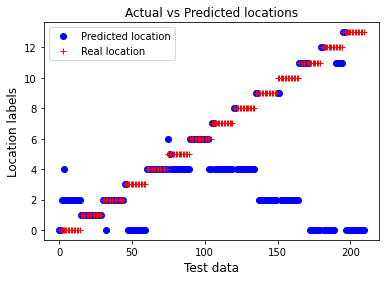

In [ ]:
import time

from google.colab import files
start_time = time.time()
predict_labels = model.predict(x_test)
print("--- %s seconds ---" % (time.time() - start_time))
test_loss, test_acc = model.evaluate(x_test[:1,:,:], y_test[:1])


print(predict_labels.argmax(axis=1))
print(y_test)

plt.plot((predict_labels.argmax(axis=1)),'bo')
plt.plot((y_test),'r+')
plt.ylabel("Location labels", fontsize="large")
plt.xlabel("Test data", fontsize="large")
plt.legend(["Predicted location", "Real location"], loc="best")
plt.title("Actual vs Predicted locations")
plt.savefig("Actual_vs_Predicted_locations.svg")

print("Test accuracy", test_acc)
print("Test loss", test_loss)

# !mkdir -p saved_model
# model.save('/content/my_model') 
# !zip -r /content/my_model.zip /content/my_model
# files.download("/content/my_model.zip")


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("my_model1.zip")
zip_ref.extractall()
zip_ref.close()
model = keras.models.load_model("/content/my_model1")

predict_labels = model.predict(x_test)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(predict_labels.argmax(axis=1))
print(y_test)

plt.plot((predict_labels.argmax(axis=1)),'bo')
plt.plot((y_test),'r+')

print("Test accuracy", test_acc)
print("Test loss", test_loss)

!mkdir -p saved_model
model.save('/content/my_model') 
!zip -r /content/file.zip /content/my_model
files.download("/content/my_model.zip")


Normalization

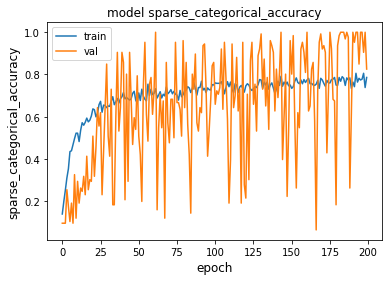

In [ ]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.title("model " + metric)
plt.savefig("total_sparse_categorical_accuracy.svg")
plt.show()
plt.close()
